In [308]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping
from sklearn import preprocessing
from tensorflow.keras import layers
from keras.layers import LSTM
from keras.layers import concatenate
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import numpy as np

In [309]:
import pandas as pd
df_train=pd.read_csv("./NSL_KDD_Dataset/KDDTrain+.txt")
df_test=pd.read_csv("./NSL_KDD_Dataset/KDDTest+.txt")

In [310]:
df_train.head()

,0,tcp,ftp_data,SF,491,0.1,0.2,0.3,0.4,0.5,...,0.17,0.03,0.17.1,0.00.6,0.00.7,0.00.8,0.05,0.00.9,normal,20
0,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21


In [311]:
df_train.dropna(inplace=True,axis=1) # For now, just drop NA's 
# (rows with missing values)

# The CSV file has no column heads, so add them
df_train.columns = [
    'duration',
    'protocol_type',
    'service',
    'flag',
    'src_bytes',
    'dst_bytes',
    'land',
    'wrong_fragment',
    'urgent',
    'hot',
    'num_failed_logins',
    'logged_in',
    'num_compromised',
    'root_shell',
    'su_attempted',
    'num_root',
    'num_file_creations',
    'num_shells',
    'num_access_files',
    'num_outbound_cmds',
    'is_host_login',
    'is_guest_login',
    'count',
    'srv_count',
    'serror_rate',
    'srv_serror_rate',
    'rerror_rate',
    'srv_rerror_rate',
    'same_srv_rate',
    'diff_srv_rate',
    'srv_diff_host_rate',
    'dst_host_count',
    'dst_host_srv_count',
    'dst_host_same_srv_rate',
    'dst_host_diff_srv_rate',
    'dst_host_same_src_port_rate',
    'dst_host_srv_diff_host_rate',
    'dst_host_serror_rate',
    'dst_host_srv_serror_rate',
    'dst_host_rerror_rate',
    'dst_host_srv_rerror_rate',
    'attack_type',
    'Score'
]


In [312]:
df_train.drop('Score',axis=1, inplace=True)

In [313]:
df_train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_type
0,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal
1,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune
2,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal
3,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal
4,0,tcp,private,REJ,0,0,0,0,0,0,...,19,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune


In [314]:
df_train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_type
0,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal
1,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune
2,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal
3,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal
4,0,tcp,private,REJ,0,0,0,0,0,0,...,19,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune


In [315]:
df_train.groupby('attack_type')['attack_type'].count()

attack_type
back                 956
buffer_overflow       30
ftp_write              8
guess_passwd          53
imap                  11
ipsweep             3599
land                  18
loadmodule             9
multihop               7
neptune            41214
nmap                1493
normal             67342
perl                   3
phf                    4
pod                  201
portsweep           2931
rootkit               10
satan               3633
smurf               2646
spy                    2
teardrop             892
warezclient          890
warezmaster           20
Name: attack_type, dtype: int64

In [316]:
label_encoder1 = preprocessing.LabelEncoder() 
df_train['protocol_type']= label_encoder1.fit_transform(df_train['protocol_type']) 
a=label_encoder1.classes_ 
label_encoder1.classes_

array(['icmp', 'tcp', 'udp'], dtype=object)

In [317]:
label_encoder1 = preprocessing.LabelEncoder() 
df_train['flag']= label_encoder1.fit_transform(df_train['flag']) 
a=label_encoder1.classes_ 
label_encoder1.classes_

array(['OTH', 'REJ', 'RSTO', 'RSTOS0', 'RSTR', 'S0', 'S1', 'S2', 'S3',
       'SF', 'SH'], dtype=object)

In [318]:
label_encoder1 = preprocessing.LabelEncoder() 
df_train['service']= label_encoder1.fit_transform(df_train['service']) 
a=label_encoder1.classes_ 
label_encoder1.classes_

array(['IRC', 'X11', 'Z39_50', 'aol', 'auth', 'bgp', 'courier',
       'csnet_ns', 'ctf', 'daytime', 'discard', 'domain', 'domain_u',
       'echo', 'eco_i', 'ecr_i', 'efs', 'exec', 'finger', 'ftp',
       'ftp_data', 'gopher', 'harvest', 'hostnames', 'http', 'http_2784',
       'http_443', 'http_8001', 'imap4', 'iso_tsap', 'klogin', 'kshell',
       'ldap', 'link', 'login', 'mtp', 'name', 'netbios_dgm',
       'netbios_ns', 'netbios_ssn', 'netstat', 'nnsp', 'nntp', 'ntp_u',
       'other', 'pm_dump', 'pop_2', 'pop_3', 'printer', 'private',
       'red_i', 'remote_job', 'rje', 'shell', 'smtp', 'sql_net', 'ssh',
       'sunrpc', 'supdup', 'systat', 'telnet', 'tftp_u', 'tim_i', 'time',
       'urh_i', 'urp_i', 'uucp', 'uucp_path', 'vmnet', 'whois'],
      dtype=object)

In [319]:
label_encoder1 = preprocessing.LabelEncoder() 
df_train['attack_type']= label_encoder1.fit_transform(df_train['attack_type']) 
a=label_encoder1.classes_ 
label_encoder1.classes_

array(['back', 'buffer_overflow', 'ftp_write', 'guess_passwd', 'imap',
       'ipsweep', 'land', 'loadmodule', 'multihop', 'neptune', 'nmap',
       'normal', 'perl', 'phf', 'pod', 'portsweep', 'rootkit', 'satan',
       'smurf', 'spy', 'teardrop', 'warezclient', 'warezmaster'],
      dtype=object)

In [320]:
int_features=['tcp','private','REJ']
int_features

['tcp', 'private', 'REJ']

In [321]:
for i in range(len(a)):
        if a[i]==int_features[0]:
            int_features[0]=i


int_features

['tcp', 'private', 'REJ']

In [322]:
df_train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_type
0,0,2,44,9,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,11
1,0,1,49,5,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,9
2,0,1,24,9,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,11
3,0,1,24,9,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,11
4,0,1,49,1,0,0,0,0,0,0,...,19,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,9


In [323]:
y=df_train['attack_type']   #labels
x=df_train.drop(['attack_type'],axis=1) #feature

In [324]:
x

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,2,44,9,146,0,0,0,0,0,...,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00
1,0,1,49,5,0,0,0,0,0,0,...,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00
2,0,1,24,9,232,8153,0,0,0,0,...,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01
3,0,1,24,9,199,420,0,0,0,0,...,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,0,1,49,1,0,0,0,0,0,0,...,255,19,0.07,0.07,0.00,0.00,0.00,0.00,1.00,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125967,0,1,49,5,0,0,0,0,0,0,...,255,25,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00
125968,8,2,49,9,105,145,0,0,0,0,...,255,244,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00
125969,0,1,54,9,2231,384,0,0,0,0,...,255,30,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00
125970,0,1,30,5,0,0,0,0,0,0,...,255,8,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00


In [325]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.25, random_state=42)

In [326]:
x_train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
103474,0,1,24,9,201,1263,0,0,0,0,...,33,255,1.00,0.00,0.03,0.02,0.0,0.0,0.00,0.0
20983,0,1,20,9,190,0,0,0,0,0,...,244,8,0.03,0.02,0.03,0.00,0.0,0.0,0.83,0.0
103667,0,0,14,9,8,0,0,0,0,0,...,1,75,1.00,0.00,1.00,0.51,0.0,0.0,0.00,0.0
83047,0,1,49,5,0,0,0,0,0,0,...,255,5,0.02,0.07,0.00,0.00,1.0,1.0,0.00,0.0
58076,0,0,14,9,8,0,0,0,0,0,...,2,158,1.00,0.00,1.00,0.25,0.0,0.0,0.00,0.0


In [327]:
y_train.shape

(94479,)

In [328]:
x_train_1 = x_train[x_train.columns[0:15]]
x_train_2 = x_train[x_train.columns[15:30]]
x_train_3 = x_train[x_train.columns[30:41]]

In [329]:
x_test_1 = x_test[x_test.columns[0:15]]
x_test_2 = x_test[x_test.columns[15:30]]
x_test_3 = x_test[x_test.columns[30:41]]

In [330]:
x_train_3.shape

(94479, 11)

In [331]:
y_train

103474    11
20983     11
103667     5
83047      9
58076     10
          ..
119879     9
103694     9
860       11
15795     11
121958    11
Name: attack_type, Length: 94479, dtype: int32

In [332]:
layer_one=Sequential()
layer_one.add(Conv1D(8, 3, activation='relu', input_shape=(15, 1), name = 'Conv1D-1'))
layer_one.add(MaxPooling1D(2, name = 'MaxPool-1'))
layer_one.add(Flatten(name = 'flatten-1'))
layer_one.add(Dense(32, activation='relu', name = 'dense-1'))

layer_two=Sequential()
layer_two.add(Conv1D(8, 3, activation='relu', input_shape=(15, 1), name = 'Conv1D-2'))
layer_two.add(MaxPooling1D(2, name = 'MaxPool-2'))
layer_two.add(Flatten(name = 'flatten-2'))
layer_two.add(Dense(32, activation='relu', name = 'dense-2'))

layer_three=Sequential()
layer_three.add(Conv1D(8, 3, activation='relu', input_shape=(11, 1), name = 'Conv1D-3'))
layer_three.add(MaxPooling1D(2, name = 'MaxPool-3'))
layer_three.add(Flatten(name = 'flatten-3'))
layer_three.add(Dense(32, activation='relu', name = 'dense-3'))

combined=concatenate([layer_one.output, layer_two.output, layer_three.output], name = 'concatenate')
z=Dense(128, activation='relu', name = 'dense-4')(combined)
z=Dense(20, activation='relu', name = 'dense-5')(z)
z=Dropout(0.25, name = 'drop_out')(z)
z=Dense(5, activation='relu', name = 'dense-6')(z)


model=Model(inputs=[layer_one.input, layer_two.input, layer_three.input], outputs=z)
model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.summary()

Model: "model_16"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 Conv1D-1_input (InputLayer)    [(None, 15, 1)]      0           []                               
                                                                                                  
 Conv1D-2_input (InputLayer)    [(None, 15, 1)]      0           []                               
                                                                                                  
 Conv1D-3_input (InputLayer)    [(None, 11, 1)]      0           []                               
                                                                                                  
 Conv1D-1 (Conv1D)              (None, 13, 8)        32          ['Conv1D-1_input[0][0]']         
                                                                                           

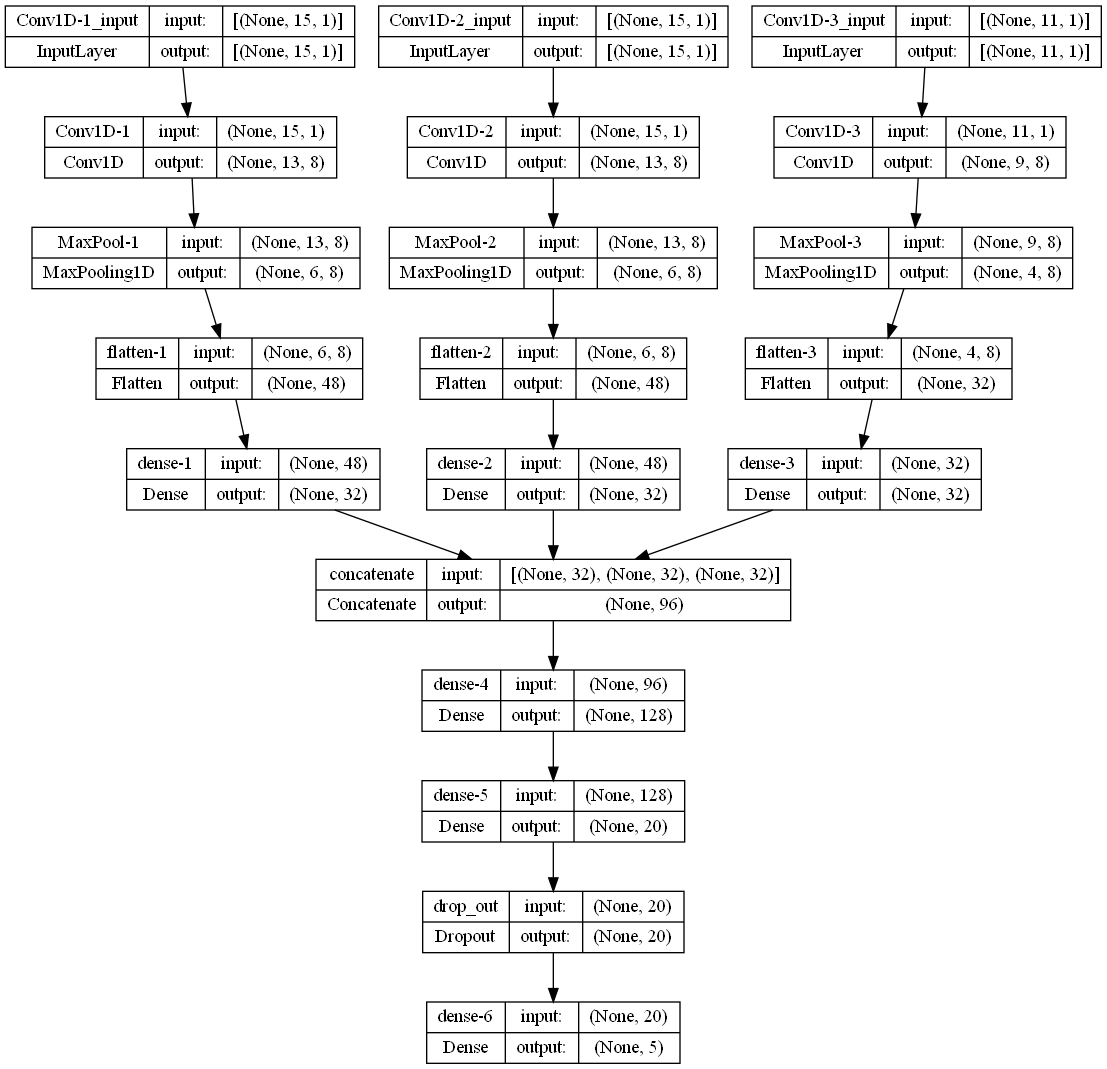

In [333]:
import tensorflow as tf
from tensorflow.keras.utils import plot_model
tf.keras.utils.plot_model(model, to_file='model.png', show_shapes=True)

In [334]:
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, 
                        patience=5, verbose=1, mode='auto',
                           restore_best_weights=True)
model.fit([x_train_1,x_train_2,x_train_3],[y_train,y_train,y_train],validation_data=([x_test_1,x_test_2,x_test_3],[y_test,y_test,y_test]),
          callbacks=[monitor],verbose=2,epochs=1000)

Epoch 1/1000
2953/2953 - 12s - loss: 69821.6719 - mae: 6.1120 - val_loss: 10.1352 - val_mae: 1.9369 - 12s/epoch - 4ms/step
Epoch 2/1000
2953/2953 - 11s - loss: 21.5924 - mae: 3.4495 - val_loss: 8.0363 - val_mae: 1.8499 - 11s/epoch - 4ms/step
Epoch 3/1000
2953/2953 - 10s - loss: 13.4254 - mae: 2.7169 - val_loss: 6.7174 - val_mae: 1.8126 - 10s/epoch - 3ms/step
Epoch 4/1000
2953/2953 - 10s - loss: 13.3571 - mae: 2.3625 - val_loss: 3.4021 - val_mae: 1.1154 - 10s/epoch - 3ms/step
Epoch 5/1000
2953/2953 - 10s - loss: 6.6388 - mae: 1.7922 - val_loss: 2.8831 - val_mae: 1.1195 - 10s/epoch - 3ms/step
Epoch 6/1000
2953/2953 - 11s - loss: 4.4961 - mae: 1.3835 - val_loss: 2.4554 - val_mae: 0.8411 - 11s/epoch - 4ms/step
Epoch 7/1000
2953/2953 - 12s - loss: 3.2081 - mae: 1.0359 - val_loss: 2.1314 - val_mae: 0.7057 - 12s/epoch - 4ms/step
Epoch 8/1000
2953/2953 - 12s - loss: 3.0520 - mae: 1.0092 - val_loss: 2.1466 - val_mae: 0.7793 - 12s/epoch - 4ms/step
Epoch 9/1000
2953/2953 - 12s - loss: 2.9639 - ma

In [335]:
from sklearn.metrics import f1_score
from sklearn import metrics
pred = model.predict([x_test_1,x_test_2,x_test_3])
pred = np.argmax(pred,axis=1)

y_eval = np.argmax([y_test,y_test,y_test],axis=0)
score = metrics.accuracy_score(y_eval, pred)
f1score= f1_score(y_eval, pred, average='micro')
print("Validation score: {}".format(score))
print("f1 score: {}".format(f1score))
print(metrics.confusion_matrix(y_eval, pred))

985/985 [==============================] - 2s 2ms/step
Validation score: 0.9249356999968247
f1 score: 0.9249356999968247
[[29129   390     1    62  1911]
 [    0     0     0     0     0]
 [    0     0     0     0     0]
 [    0     0     0     0     0]
 [    0     0     0     0     0]]
